# Tugas 4

In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/ppw/report/tugas-ppw/data_berita_detik.csv")
df.head()

,judul,tanggal,isi,kategori
0,Awal Mula J&J Digugat Rp 233 Miliar Buntut Kas...,"Rabu, 16 Okt 2024 15:03 WIB",Jakarta - Seorang pria bernama Evan Plotkin di...,Kesehatan
1,XLIFE Hadirkan Jasa Terapis Pijat Profesional ...,"Rabu, 16 Okt 2024 14:32 WIB",Jakarta - Manfaat dari terapi pijat selain rel...,Kesehatan
2,"Eks PM Malaysia Mahathir Mohamad Masuk RS, Sak...","Rabu, 16 Okt 2024 14:31 WIB",Jakarta - Mantan Perdana Menteri Malaysia Tun ...,Kesehatan
3,Aksi Nyeleneh Ritual Miliarder AS Ganti Plasma...,"Rabu, 16 Okt 2024 14:01 WIB","Jakarta - Miliarder Amerika Serikat, Bryan Joh...",Kesehatan
4,"Uji Klinis di RI Makin Turun Tiap Tahun, Kalah...","Rabu, 16 Okt 2024 13:30 WIB",Jakarta - Dirjen Kefarmasian dan Alat Kesehata...,Kesehatan


In [104]:
# mengambil satu sample berita
sample_berita = df['isi'].iloc[2]
print(sample_berita)


Jakarta - Mantan Perdana Menteri Malaysia Tun Dr Mahathir Mohamad dirawat di rumah sakit karena infeksi saluran pernapasan. Dikutip dari Reuters , Mahathir yang seharusnya menghadiri pengadilan pada hari Rabu (16/10/2024), untuk kasus pencemaran nama baik yang diajukannya terhadap wakil perdana menteri, saat ini harus ditunda. Saat ini, mantan perdana menteri yang bertugas selama dua dekade itu sudah dirawat di Institut Jantung Nasional. Menurut seorang ajudan, Mahathir dirawat di rumah sakit sejak Selasa (15/10) malam. Ia mengalami gejala batuk akibat infeksi saluran pernapasan bawah. Akibat kondisi tersebut, Mahathir akan menjalani cuti sakit hingga 25 Oktober mendatang. Sebelumnya, pria berusia 99 tahun itu sempat dirawat di rumah sakit karena batuk pada 18 Juli. Saat itu, ia dilarikan ke rumah sakit sejak 15 Juli dan dirawat beberapa hari. Namun, saat itu juru bicara Mahathir tidak memberikan rincian lebih lanjut tentang kondisi eks perdana menteri tersebut. Mahathir juga memiliki 

memisahkan per kalimat


---




In [105]:
# Membuat list untuk menyimpan hasil
result_list = []

# Pisahkan kalimat berdasarkan titik
sentences = sample_berita.split('.')  # Pisahkan kalimat berdasarkan titik
sentences = [s.strip() for s in sentences if s.strip()]  # Hilangkan spasi berlebih dan kosong

# Looping untuk menambahkan setiap kalimat ke result_list
for i, sentence in enumerate(sentences, 1):
    result_list.append({'kalimat ke n': f"Kalimat ke {i}", 'kalimat': sentence})

# Membuat DataFrame dari hasil pemisahan
result_df = pd.DataFrame(result_list)

# Tampilkan DataFrame
result_df


,kalimat ke n,kalimat
0,Kalimat ke 1,Jakarta - Mantan Perdana Menteri Malaysia Tun ...
1,Kalimat ke 2,"Dikutip dari Reuters , Mahathir yang seharusny..."
2,Kalimat ke 3,"Saat ini, mantan perdana menteri yang bertugas..."
3,Kalimat ke 4,"Menurut seorang ajudan, Mahathir dirawat di ru..."
4,Kalimat ke 5,Ia mengalami gejala batuk akibat infeksi salur...
5,Kalimat ke 6,"Akibat kondisi tersebut, Mahathir akan menjala..."
6,Kalimat ke 7,"Sebelumnya, pria berusia 99 tahun itu sempat d..."
7,Kalimat ke 8,"Saat itu, ia dilarikan ke rumah sakit sejak 15..."
8,Kalimat ke 9,"Namun, saat itu juru bicara Mahathir tidak mem..."
9,Kalimat ke 10,Mahathir juga memiliki riwayat masalah jantung...


pre processing


---



In [106]:
!pip install Sastrawi

In [107]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.tokenize import sent_tokenize
import networkx as nx
import matplotlib.pyplot as plt


# Download stopwords untuk bahasa Indonesia
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

# Fungsi preprocessing yang disesuaikan
def remove_url(data_berita):
    url = re.compile(r'https?://\S+|www\.S+')
    return url.sub(r'', data_berita)

def remove_html(data_berita):
    html = re.compile(r'<.#?>')
    return html.sub(r'', data_berita)

def remove_emoji(data_berita):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticon
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', data_berita)

def remove_numbers(data_berita):
    data_berita = re.sub(r'\d+', '', data_berita)
    return data_berita

def remove_symbols(data_berita):
    data_berita = re.sub(r'[^a-zA-Z0-9\s]', '', data_berita)
    return data_berita

def case_folding(text):
    if isinstance(text, str):
        return text.lower()
    return text

def tokenize(text):
    return text.split()

def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    return [stemmer.stem(word) for word in text]

# Looping setiap kalimat di dataframe 'result_df'
result_df['clean'] = result_df['kalimat'].apply(remove_url)
result_df['clean'] = result_df['clean'].apply(remove_html)
result_df['clean'] = result_df['clean'].apply(remove_emoji)
result_df['clean'] = result_df['clean'].apply(remove_symbols)
result_df['clean'] = result_df['clean'].apply(remove_numbers)
result_df['clean'] = result_df['clean'].apply(case_folding)
result_df['tokenize'] = result_df['clean'].apply(tokenize)
result_df['stopword removal'] = result_df['tokenize'].apply(remove_stopwords)
result_df['stemming'] = result_df['stopword removal'].apply(stemming)

# Gabungkan kata setelah stemming
result_df['final'] = result_df['stemming'].apply(lambda x: ' '.join(x))

# Tampilkan hasil dataframe
result_df[['kalimat ke n', 'final']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,kalimat ke n,final
0,Kalimat ke 1,jakarta mantan perdana menteri malaysia tun dr...
1,Kalimat ke 2,kutip reuters mahathir hadir adil rabu cemar n...
2,Kalimat ke 3,mantan perdana menteri tugas dekade rawat inst...
3,Kalimat ke 4,ajudan mahathir rawat rumah sakit selasa malam
4,Kalimat ke 5,alami gejala batuk akibat infeksi salur napas
5,Kalimat ke 6,akibat kondisi mahathir jalan cuti sakit oktober
6,Kalimat ke 7,pria usia rawat rumah sakit batuk juli
7,Kalimat ke 8,lari rumah sakit juli rawat
8,Kalimat ke 9,juru bicara mahathir rincian kondisi eks perda...
9,Kalimat ke 10,mahathir milik riwayat jantung rawat lembaga j...


TF-IDF


---

menghitung skor **TF-IDF (Term Frequency-Inverse Document Frequency)** dari setiap kata dalam kalimat yang telah diproses untuk menilai seberapa penting kata-kata tersebut dalam konteks kalimat. Pertama, kalimat-kalimat digabung menjadi dokumen, kemudian TF-IDF diterapkan untuk menghasilkan matriks yang menunjukkan skor setiap kata dalam setiap kalimat. Nama-nama kata (fitur) diambil dan hasil TF-IDF ini diubah menjadi tabel agar lebih mudah dianalisis. Selanjutnya, ditambahkan kolom identifikasi untuk setiap kalimat, dan akhirnya tabel tersebut ditampilkan dengan menampilkan skor TF-IDF dari kata-kata di setiap kalimat.

In [108]:
# Gabungkan semua kalimat hasil stemming menjadi dokumen untuk tiap kalimat
documents = result_df['final'].tolist()

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Terapkan TF-IDF ke dokumen (kalimat yang sudah dipreproses)
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Mendapatkan nama-nama fitur (kata-kata)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Mengubah hasil TF-IDF menjadi dataframe
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Tambahkan kolom 'no' dan 'kalimat ke n' untuk identifikasi
tfidf_df.insert(0, 'kalimat ke n', result_df['kalimat ke n'])

# Tampilkan dataframe dengan skor TF-IDF
tfidf_df

,kalimat ke n,adil,aju,ajudan,akibat,alami,batuk,bicara,bypass,cemar,...,rumah,sakit,salur,saonaf,selasa,tugas,tun,tunda,usia,wakil
0,Kalimat ke 1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.211575,0.191849,0.266843,0.0,0.000000,0.00000,0.310712,0.000000,0.000000,0.000000
1,Kalimat ke 2,0.298206,0.298206,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.298206,...,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.298206,0.000000,0.298206
2,Kalimat ke 3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.38575,0.000000,0.000000,0.000000,0.000000
3,Kalimat ke 4,0.000000,0.000000,0.472424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.321690,0.291698,0.000000,0.0,0.472424,0.00000,0.000000,0.000000,0.000000,0.000000
4,Kalimat ke 5,0.000000,0.000000,0.000000,0.360103,0.419303,0.360103,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.360103,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
5,Kalimat ke 6,0.000000,0.000000,0.000000,0.387507,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.278601,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
6,Kalimat ke 7,0.000000,0.000000,0.000000,0.000000,0.000000,0.398785,0.000000,0.000000,0.000000,...,0.316189,0.286709,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.464345,0.000000
7,Kalimat ke 8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.399838,0.362559,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
8,Kalimat ke 9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.408837,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
9,Kalimat ke 10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


**Menghitung kemiripan antar kalimat**


---


Kalimat-kalimat dalam kumpulan teks yang telah diubah menjadi angka menggunakan TF-IDF, dan kemudian dihitung cosine similarity-nya. Nilai cosine similarity ini menunjukkan seberapa mirip dua kalimat. Jika angkanya mendekati 1, berarti dua kalimat sangat mirip, sedangkan jika mendekati 0, berarti tidak mirip.

In [109]:
# Menghitung cosine similarity antar kalimat berdasarkan TF-IDF
cosine_sim = cosine_similarity(tfidf_matrix)

# Membuat dataframe untuk menyimpan hasil cosine similarity
cosine_sim_df = pd.DataFrame(cosine_sim, index=result_df['kalimat ke n'], columns=result_df['kalimat ke n'])

# Tampilkan matriks cosine similarity
cosine_sim_df

kalimat ke n,Kalimat ke 1,Kalimat ke 2,Kalimat ke 3,Kalimat ke 4,Kalimat ke 5,Kalimat ke 6,Kalimat ke 7,Kalimat ke 8,Kalimat ke 9,Kalimat ke 10,Kalimat ke 11,Kalimat ke 12
kalimat ke n,,,,,,,,,,,,
Kalimat ke 1,1.000000,0.115374,0.237646,0.217333,0.288273,0.098009,0.167759,0.212141,0.158176,0.085207,0.000000,0.0
Kalimat ke 2,0.115374,1.000000,0.106675,0.044777,0.000000,0.042767,0.000000,0.000000,0.151810,0.040889,0.000000,0.0
Kalimat ke 3,0.237646,0.106675,1.000000,0.057922,0.000000,0.000000,0.056931,0.071993,0.146250,0.175632,0.000000,0.0
Kalimat ke 4,0.217333,0.044777,0.057922,1.000000,0.000000,0.149019,0.255071,0.322550,0.061389,0.129554,0.000000,0.0
Kalimat ke 5,0.288273,0.000000,0.000000,0.000000,1.000000,0.139542,0.143603,0.000000,0.000000,0.000000,0.000000,0.0
Kalimat ke 6,0.098009,0.042767,0.000000,0.149019,0.139542,1.000000,0.079877,0.101009,0.194691,0.061869,0.201139,0.0
Kalimat ke 7,0.167759,0.000000,0.056931,0.255071,0.143603,0.079877,1.000000,0.518135,0.000000,0.063669,0.000000,0.0
Kalimat ke 8,0.212141,0.000000,0.071993,0.322550,0.000000,0.101009,0.518135,1.000000,0.000000,0.080513,0.000000,0.0
Kalimat ke 9,0.158176,0.151810,0.146250,0.061389,0.000000,0.194691,0.000000,0.000000,1.000000,0.056058,0.000000,0.0


**Membuat matriks adjacency berdasarkan nilai ambang batas**

---



membuat **matriks adjacency** berdasarkan nilai **cosine similarity** antar kalimat. Pertama, ambang batas (**threshold**) ditetapkan pada 0,5, yang berarti bahwa jika nilai cosine similarity antara dua kalimat sama dengan atau lebih besar dari 0,5, maka akan diberi nilai 1 (menunjukkan adanya keterkaitan antara kalimat); jika lebih kecil dari itu, diberi nilai 0 (tidak ada keterkaitan). Hasil ini disimpan dalam sebuah matriks adjacency, yang kemudian diubah menjadi **dataframe** untuk menampilkan hasilnya secara lebih jelas dengan baris dan kolom yang mewakili setiap kalimat.

In [110]:
# Tetapkan ambang batas (threshold)
threshold = 0.07

# Buat matriks adjacency: jika cosine similarity >= 0.5, maka 1; jika tidak, maka 0
adjacency_matrix = np.where(cosine_sim >= threshold, 1, 0)

# Buat dataframe untuk menampilkan matriks adjacency
adjacency_df = pd.DataFrame(adjacency_matrix, index=result_df['kalimat ke n'], columns=result_df['kalimat ke n'])

# Tampilkan matriks adjacency
adjacency_df

kalimat ke n,Kalimat ke 1,Kalimat ke 2,Kalimat ke 3,Kalimat ke 4,Kalimat ke 5,Kalimat ke 6,Kalimat ke 7,Kalimat ke 8,Kalimat ke 9,Kalimat ke 10,Kalimat ke 11,Kalimat ke 12
kalimat ke n,,,,,,,,,,,,
Kalimat ke 1,1,1,1,1,1,1,1,1,1,1,0,0
Kalimat ke 2,1,1,1,0,0,0,0,0,1,0,0,0
Kalimat ke 3,1,1,1,0,0,0,0,1,1,1,0,0
Kalimat ke 4,1,0,0,1,0,1,1,1,0,1,0,0
Kalimat ke 5,1,0,0,0,1,1,1,0,0,0,0,0
Kalimat ke 6,1,0,0,1,1,1,1,1,1,0,1,0
Kalimat ke 7,1,0,0,1,1,1,1,1,0,0,0,0
Kalimat ke 8,1,0,1,1,0,1,1,1,0,1,0,0
Kalimat ke 9,1,1,1,0,0,1,0,0,1,0,0,0


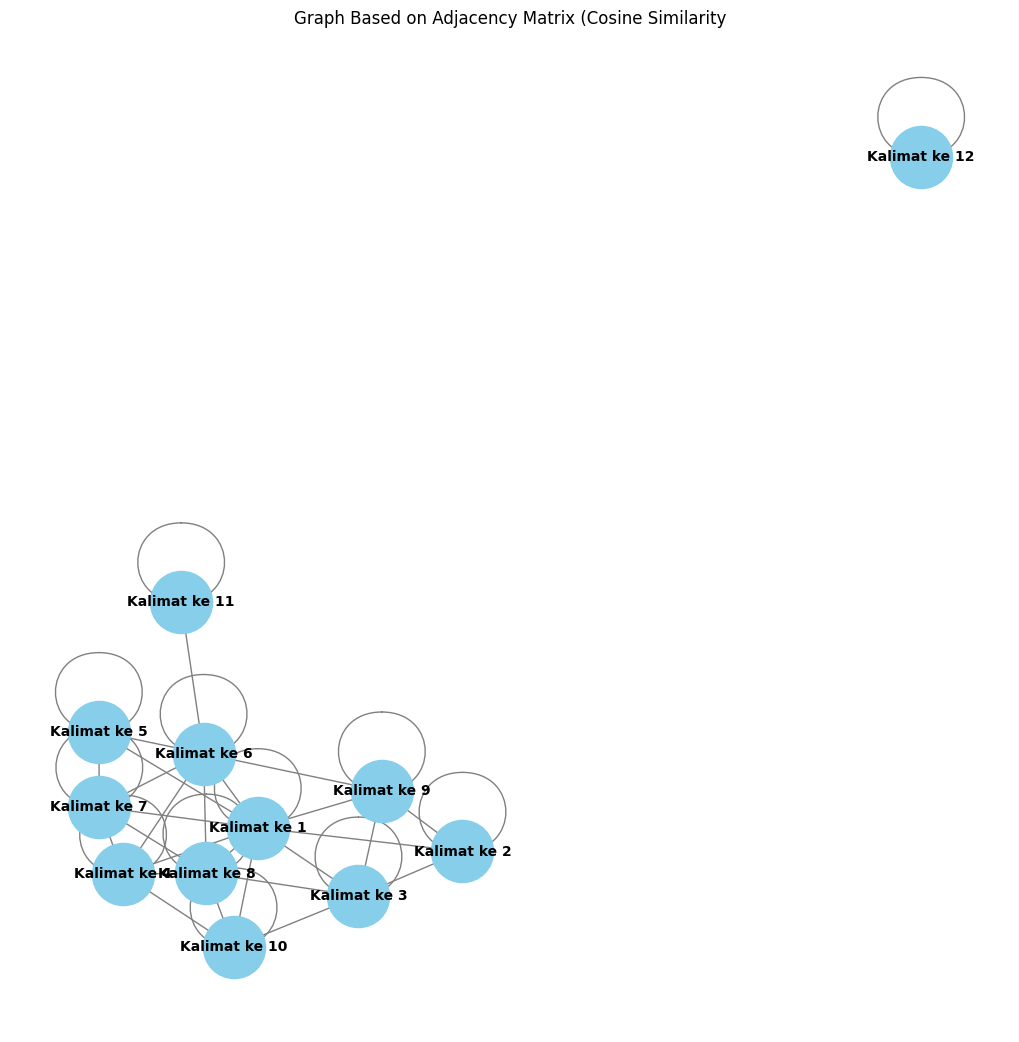

In [111]:
# Buat graf dari matriks adjacency
G = nx.from_numpy_array(adjacency_matrix)

# Atur label node agar sesuai dengan 'kalimat ke n'
mapping = {i: f"Kalimat ke {i+1}" for i in range(len(result_df))}
G = nx.relabel_nodes(G, mapping)

# Menggambar graf
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_color='black', edge_color='gray', linewidths=1, font_weight='bold')

# Tampilkan graf
plt.title("Graph Based on Adjacency Matrix (Cosine Similarity")
plt.show()

In [112]:
# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Menghitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Buat dataframe untuk menampilkan hasil centrality
centrality_df = pd.DataFrame({
    'Kalimat': list(betweenness_centrality.keys()),
    'Betweenness Centrality': list(betweenness_centrality.values()),
    'Degree Centrality': list(degree_centrality.values()),
    'Closeness Centrality': list(closeness_centrality.values())
})

# Tampilkan dataframe centrality
centrality_df

,Kalimat,Betweenness Centrality,Degree Centrality,Closeness Centrality
0,Kalimat ke 1,0.227273,1.000000,0.826446
1,Kalimat ke 2,0.000000,0.454545,0.505051
2,Kalimat ke 3,0.033333,0.636364,0.568182
3,Kalimat ke 4,0.018182,0.636364,0.606061
4,Kalimat ke 5,0.000000,0.454545,0.534759
5,Kalimat ke 6,0.209091,0.818182,0.699301
6,Kalimat ke 7,0.012121,0.636364,0.606061
7,Kalimat ke 8,0.045455,0.727273,0.649351
8,Kalimat ke 9,0.030303,0.545455,0.568182
9,Kalimat ke 10,0.006061,0.545455,0.534759


In [114]:
top = centrality_df.sort_values(by='Betweenness Centrality', ascending=False).head(5)
top

,Kalimat,Betweenness Centrality,Degree Centrality,Closeness Centrality
0,Kalimat ke 1,0.227273,1.000000,0.826446
5,Kalimat ke 6,0.209091,0.818182,0.699301
7,Kalimat ke 8,0.045455,0.727273,0.649351
2,Kalimat ke 3,0.033333,0.636364,0.568182
8,Kalimat ke 9,0.030303,0.545455,0.568182
